SVM: Datacov

In [13]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
mainpath = r"C:\Users\Alexander\Documents\MLE_ProyectoFinal\data\raw"
filename = "Data_cov.csv"
fullpath = os.path.join(mainpath, filename)


In [28]:
df.head(10)

Sector          Dep  Impactado         Saldo  Desembolso_mes  \
0  INDUSTRIA         Lima          0   56643.10092             0.0   
1   COMERCIO     Arequipa          0  190313.99460             0.0   
2   SERVICIO     Amazonas          0  547601.57360             0.0   
3  INDUSTRIA         Lima          0  283914.20840             0.0   
4   COMERCIO        Cusco          0  142296.43840             0.0   
5   COMERCIO         Lima          0  456005.09530             0.0   
6   COMERCIO  La Libertad          0   76984.28362             0.0   
7   COMERCIO         Lima          0  235218.90890             0.0   
8   COMERCIO    Cajamarca          0  531200.54440             0.0   
9   COMERCIO     Moquegua          0  138737.75300             0.0   

   Saldo Promedio  Deuda Sistea,     Pasivo  Turismo  Sector de Impacto  \
0     28321.55046       31365.73    5876.82        0                  3   
1     63437.99818       64864.99    4467.40        0                  4   
2    182533.85790      200239.32    5000.92        0                  1   
3     94638.06947      112945.17     325.50        0                  3   
4     47432.14612      144877.21       0.00        0                  4   
5    152001.69840      136066.81       0.07        0                  1   
6     25661.42787       66740.43    7650.64        0                  1   
7     78406.30297       75528.86  116242.11        0                  3   
8    177066.84810      177393.15       0.00        0                  4   
9     46245.91766       47034.40     688.55        0                  3   

     Venta   Venta Formal  Pasivo_desembolso  Deuda rezagada va  \
0  108400.0      43741.08            5876.82            -800.65   
1  105300.0      69737.17            4467.40           -2810.52   
2   86600.0      79178.83            5000.92             653.68   
3  103000.0          0.00             325.50           14820.77   
4  172920.0     171999.33               0.00           17468.60   
5  188660.0          0.00               0.07           -6302.57   
6   22055.0       5000.00            7650.64           -5973.05   
7   97400.0       5977.67          116242.11            1442.01   
8  441000.0      32673.33               0.00          -73855.46   
9  105000.0          0.00             688.55           -2250.13   

   Deuda rezagada vr  pasivo rezagada va  pasivo rezagada vr  \
0          -0.024891              830.82            0.164649   
1          -0.041529            -7043.43           -0.611896   
2           0.003275             2000.92            0.666973   
3           0.151041           -17128.30           -0.981351   
4           0.137107            -2071.80           -1.000000   
5          -0.044269                0.00            0.000000   
6          -0.082145              248.61            0.033587   
7           0.019464           -96110.34           -0.452598   
8          -0.293954           -55000.00           -1.000000   
9          -0.045656           -81172.46           -0.991589   

   Pasivo_desembolso da  Pasivo_desembolso dr  
0                830.82              0.164649  
1              -7043.43             -0.611896  
2               2000.92              0.666973  
3             -17128.30             -0.981351  
4              -2071.80             -1.000000  
5                  0.00              0.000000  
6                248.61              0.033587  
7             -96110.34             -0.452598  
8             -55000.00             -1.000000  
9             -81172.46             -0.991589

In [29]:
df2 = df

df2["Sector"] = np.where(df2["Sector"]=="INDUSTRIA", "1", df2["Sector"])
df2["Sector"] = np.where(df2["Sector"]=="COMERCIO", "2", df2["Sector"])
df2["Sector"] = np.where(df2["Sector"]=="SERVICIO", "3", df2["Sector"])
df2.Sector = df2.Sector.astype("category")
df2["Sector de Impacto"] = df2["Sector de Impacto"].astype("category",copy=False)
df2.Turismo = df2.Turismo.astype("category")

In [30]:
df2.head(5)

Sector       Dep  Impactado         Saldo  Desembolso_mes  Saldo Promedio  \
0      1      Lima          0   56643.10092             0.0     28321.55046   
1      2  Arequipa          0  190313.99460             0.0     63437.99818   
2      3  Amazonas          0  547601.57360             0.0    182533.85790   
3      1      Lima          0  283914.20840             0.0     94638.06947   
4      2     Cusco          0  142296.43840             0.0     47432.14612   

   Deuda Sistea,   Pasivo Turismo Sector de Impacto    Venta   Venta Formal  \
0       31365.73  5876.82       0                 3  108400.0      43741.08   
1       64864.99  4467.40       0                 4  105300.0      69737.17   
2      200239.32  5000.92       0                 1   86600.0      79178.83   
3      112945.17   325.50       0                 3  103000.0          0.00   
4      144877.21     0.00       0                 4  172920.0     171999.33   

   Pasivo_desembolso  Deuda rezagada va  Deuda rezagada vr  \
0            5876.82            -800.65          -0.024891   
1            4467.40           -2810.52          -0.041529   
2            5000.92             653.68           0.003275   
3             325.50           14820.77           0.151041   
4               0.00           17468.60           0.137107   

   pasivo rezagada va  pasivo rezagada vr  Pasivo_desembolso da  \
0              830.82            0.164649                830.82   
1            -7043.43           -0.611896              -7043.43   
2             2000.92            0.666973               2000.92   
3           -17128.30           -0.981351             -17128.30   
4            -2071.80           -1.000000              -2071.80   

   Pasivo_desembolso dr  
0              0.164649  
1             -0.611896  
2              0.666973  
3             -0.981351  
4             -1.000000

<Axes: >

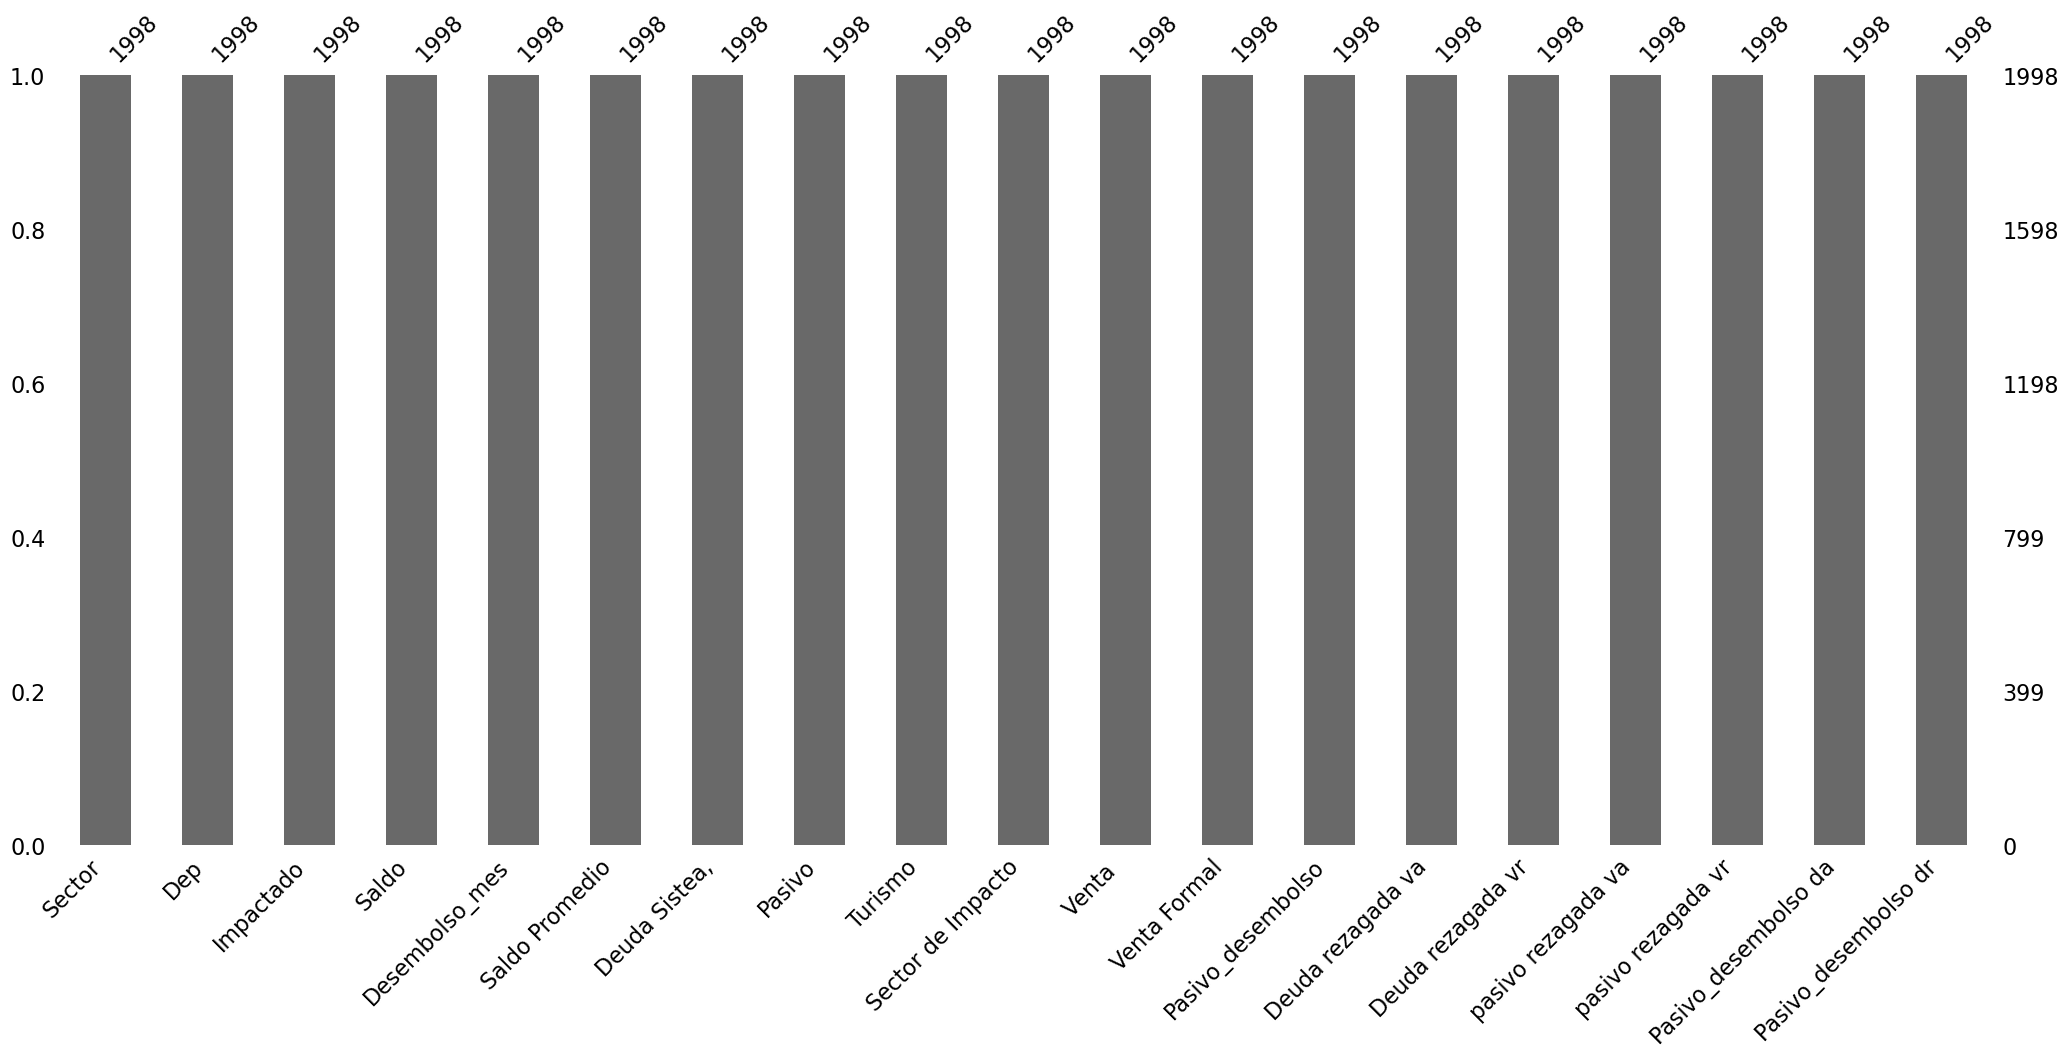

In [31]:
msno.bar(df)

In [32]:
df.dtypes

Sector                  category
Dep                       object
Impactado                  int64
Saldo                    float64
Desembolso_mes           float64
Saldo Promedio           float64
Deuda Sistea,            float64
Pasivo                   float64
Turismo                 category
Sector de Impacto       category
Venta                    float64
Venta Formal             float64
Pasivo_desembolso        float64
Deuda rezagada va        float64
Deuda rezagada vr        float64
pasivo rezagada va       float64
pasivo rezagada vr       float64
Pasivo_desembolso da     float64
Pasivo_desembolso dr     float64
dtype: object

In [36]:
# Eliminar la columna 'Impactado' del DataFrame y guardarla en 'y'
X = df.drop(['Impactado'], axis=1)
y = df['Impactado']

# Codificar variables categóricas
X_encoded = pd.get_dummies(X)

# Aplicar SelectKBest
best = SelectKBest(k=5)
X_new = best.fit_transform(X_encoded, y)
selected = best.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = X_encoded.columns[selected]
print(selected_features)

Index(['Saldo', 'Saldo Promedio', 'Pasivo', 'Pasivo_desembolso',
       'Sector de Impacto_1'],
      dtype='object')


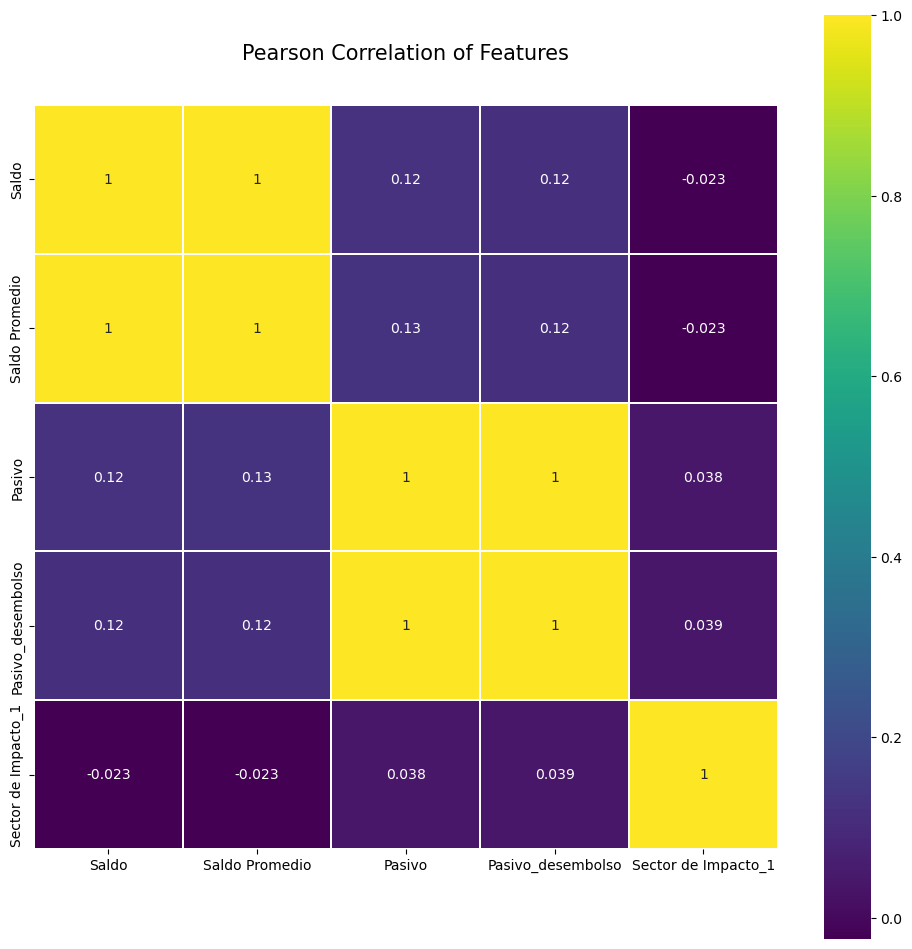

In [42]:
# Obtener los nombres de las características seleccionadas
used_features = X_encoded.columns[selected]

# Visualizar la matriz de correlación de las características seleccionadas
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_encoded[used_features].astype(float).corr(),
            linewidths=0.1, vmax=1.0, square=True, cmap='viridis',
            linecolor='white', annot=True)
plt.show()